### Importación de datos



In [89]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación

En esta sección analizaremos los datos de facturación de las cuatro tiendas, incluyendo:
- Total de ventas de productos por tienda
- Costos de envío por tienda
- Facturación total (productos + envíos)

Los análisis incluyen visualizaciones para facilitar la comparación entre tiendas.



## Total de Venta de Productos por Tienda

Análisis del monto total de venta de productos, excluyendo los costos de envío.

Total de venta de Productos tienda 1: $1,150,880,400.00
Total de venta de Productos tienda 2: $1,116,343,500.00
Total de venta de Productos tienda 3: $1,098,019,600.00
Total de venta de Productos tienda 4: $1,038,375,700.00


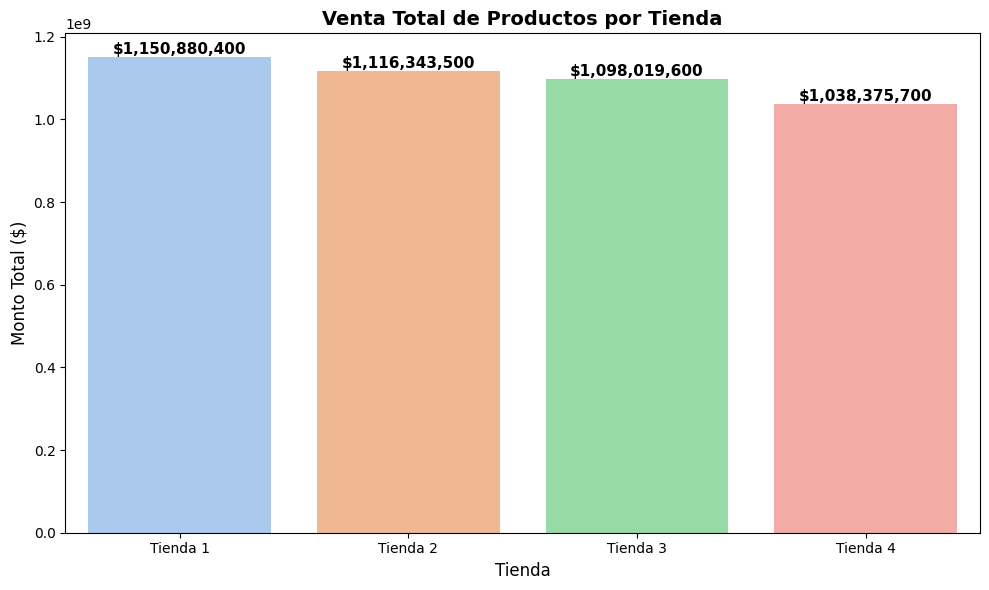

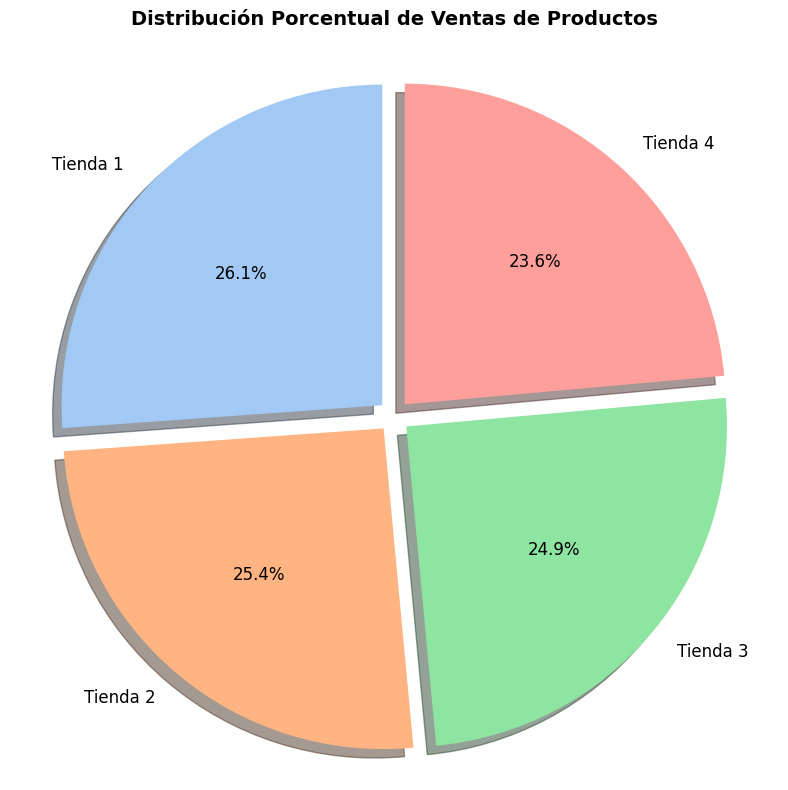


Análisis de ventas de productos:
La tienda con mayor venta de productos es Tienda 1 con $1,150,880,400.00
La tienda con menor venta de productos es Tienda 4 con $1,038,375,700.00
La diferencia entre la mayor y menor venta es $112,504,700.00


In [90]:
# Calcular el total de productos vendidos por tienda
tienda1["total_productos"] = tienda1["Precio"]
tienda2["total_productos"] = tienda2["Precio"]
tienda3["total_productos"] = tienda3["Precio"]
tienda4["total_productos"] = tienda4["Precio"]

# Calcular la suma total de productos vendidos por tienda
total_productos1 = tienda1["total_productos"].sum()
total_productos2 = tienda2["total_productos"].sum()
total_productos3 = tienda3["total_productos"].sum()
total_productos4 = tienda4["total_productos"].sum()

print(f"Total de venta de Productos tienda 1: ${total_productos1:,.2f}")
print(f"Total de venta de Productos tienda 2: ${total_productos2:,.2f}")
print(f"Total de venta de Productos tienda 3: ${total_productos3:,.2f}")
print(f"Total de venta de Productos tienda 4: ${total_productos4:,.2f}")

# Crear un DataFrame para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración visual para gráficos
plt.style.use("seaborn-v0_8-pastel")
sns.set_palette("pastel")

ventas_productos = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
        "Venta Total": [
            total_productos1,
            total_productos2,
            total_productos3,
            total_productos4,
        ],
    }
)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Tienda", y="Venta Total", data=ventas_productos, hue="Tienda", legend=False
)
plt.title("Venta Total de Productos por Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Monto Total ($)", fontsize=12)

# Añadir etiquetas de valores en las barras
for i, p in enumerate(ax.patches):
    ax.annotate(
        f'${ventas_productos["Venta Total"][i]:,.0f}',
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Análisis de la distribución porcentual de ventas por tienda
total_ventas_productos = (
    total_productos1 + total_productos2 + total_productos3 + total_productos4
)
porcentajes = [
    total_productos1 / total_ventas_productos * 100,
    total_productos2 / total_ventas_productos * 100,
    total_productos3 / total_ventas_productos * 100,
    total_productos4 / total_ventas_productos * 100,
]

# Gráfico de pastel para mostrar la participación porcentual
plt.figure(figsize=(8, 8))
plt.pie(
    porcentajes,
    labels=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    autopct="%1.1f%%",
    startangle=90,
    explode=[0.05, 0.05, 0.05, 0.05],
    shadow=True,
    textprops={"fontsize": 12},
)
plt.title(
    "Distribución Porcentual de Ventas de Productos",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
plt.axis("equal")
plt.tight_layout()
plt.show()

# Análisis e interpretación
print("\nAnálisis de ventas de productos:\n" + "=" * 30)
tienda_mayor_venta = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmax([total_productos1, total_productos2, total_productos3, total_productos4])
]
tienda_menor_venta = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmin([total_productos1, total_productos2, total_productos3, total_productos4])
]
venta_mayor = max(
    total_productos1, total_productos2, total_productos3, total_productos4
)
venta_menor = min(
    total_productos1, total_productos2, total_productos3, total_productos4
)

print(
    f"La tienda con mayor venta de productos es {tienda_mayor_venta} con ${venta_mayor:,.2f}"
)
print(
    f"La tienda con menor venta de productos es {tienda_menor_venta} con ${venta_menor:,.2f}"
)
print(
    f"La diferencia entre la mayor y menor venta es ${(venta_mayor - venta_menor):,.2f}"
)

## Costos de Envío por Tienda

Análisis de los costos de envío generados por cada tienda, que representan un componente importante de la facturación total.

Total de envío de Productos de tienda 1: $61,377,900.00
Total de envío de Productos de tienda 2: $59,485,100.00
Total de envío de Productos de tienda 3: $58,516,600.00
Total de envío de Productos de tienda 4: $55,317,400.00


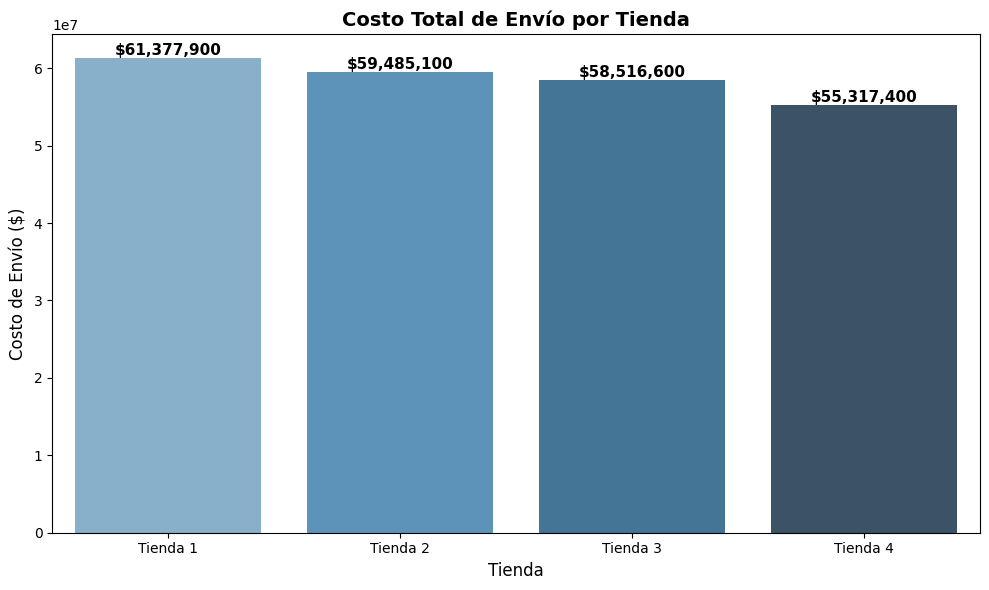

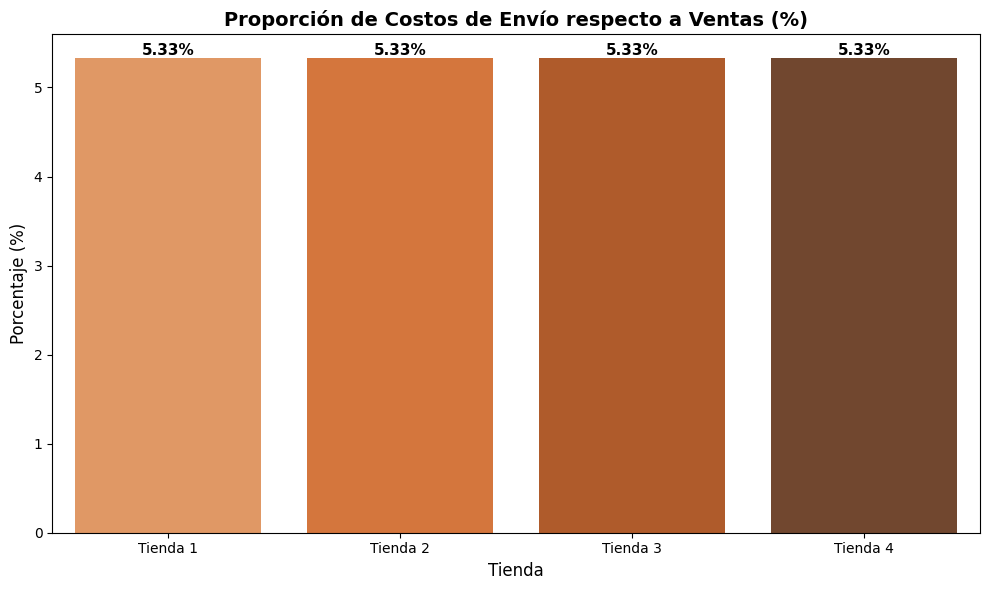


Análisis de costos de envío:
La tienda con mayor costo de envío es Tienda 1 con $61,377,900.00
La tienda con menor costo de envío es Tienda 4 con $55,317,400.00
La tienda con mayor proporción de costos de envío respecto a ventas es Tienda 1 con 5.33%
La tienda con menor proporción de costos de envío respecto a ventas es Tienda 1 con 5.33%


In [91]:
# Calculando los costos de envío para cada tienda
tienda1["total_envio"] = tienda1["Costo de envío"]
tienda2["total_envio"] = tienda2["Costo de envío"]
tienda3["total_envio"] = tienda3["Costo de envío"]
tienda4["total_envio"] = tienda4["Costo de envío"]

# Suma total de costos de envío por tienda
total_envio1 = tienda1["total_envio"].sum()
total_envio2 = tienda2["total_envio"].sum()
total_envio3 = tienda3["total_envio"].sum()
total_envio4 = tienda4["total_envio"].sum()

print(f"Total de envío de Productos de tienda 1: ${total_envio1:,.2f}")
print(f"Total de envío de Productos de tienda 2: ${total_envio2:,.2f}")
print(f"Total de envío de Productos de tienda 3: ${total_envio3:,.2f}")
print(f"Total de envío de Productos de tienda 4: ${total_envio4:,.2f}")

# Crear un DataFrame para la visualización
envios = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
        "Costo Total de Envío": [
            total_envio1,
            total_envio2,
            total_envio3,
            total_envio4,
        ],
    }
)

# Gráfico de barras para costos de envío
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Tienda",
    y="Costo Total de Envío",
    data=envios,
    hue="Tienda",
    palette="Blues_d",
    legend=False,
)
plt.title("Costo Total de Envío por Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Costo de Envío ($)", fontsize=12)

# Añadir etiquetas de valores en las barras
for i, p in enumerate(ax.patches):
    ax.annotate(
        f'${envios["Costo Total de Envío"][i]:,.0f}',
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Calculando la proporción de costos de envío respecto al precio de productos
envios["Venta de Productos"] = [
    total_productos1,
    total_productos2,
    total_productos3,
    total_productos4,
]
envios["Proporción Envío/Venta"] = (
    envios["Costo Total de Envío"] / envios["Venta de Productos"] * 100
).round(2)

# Gráfico de barras para mostrar la proporción envío/venta
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Tienda",
    y="Proporción Envío/Venta",
    data=envios,
    hue="Tienda",
    palette="Oranges_d",
    legend=False,
)
plt.title(
    "Proporción de Costos de Envío respecto a Ventas (%)",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Porcentaje (%)", fontsize=12)

# Añadir etiquetas de valores en las barras
for i, p in enumerate(ax.patches):
    ax.annotate(
        f'{envios["Proporción Envío/Venta"][i]:.2f}%',
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Análisis e interpretación
print("\nAnálisis de costos de envío:\n" + "=" * 30)
tienda_mayor_envio = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmax([total_envio1, total_envio2, total_envio3, total_envio4])
]
tienda_menor_envio = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmin([total_envio1, total_envio2, total_envio3, total_envio4])
]
tienda_mayor_prop = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmax(envios["Proporción Envío/Venta"])
]
tienda_menor_prop = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmin(envios["Proporción Envío/Venta"])
]

print(
    f"La tienda con mayor costo de envío es {tienda_mayor_envio} con ${max(total_envio1, total_envio2, total_envio3, total_envio4):,.2f}"
)
print(
    f"La tienda con menor costo de envío es {tienda_menor_envio} con ${min(total_envio1, total_envio2, total_envio3, total_envio4):,.2f}"
)
print(
    f"La tienda con mayor proporción de costos de envío respecto a ventas es {tienda_mayor_prop} con {max(envios['Proporción Envío/Venta']):.2f}%"
)
print(
    f"La tienda con menor proporción de costos de envío respecto a ventas es {tienda_menor_prop} con {min(envios['Proporción Envío/Venta']):.2f}%"
)

## Facturación Total por Tienda (Productos + Envíos)

Análisis de la facturación total que incluye tanto el valor de los productos como los costos de envío asociados.

Total facturación tienda 1: $1,212,258,300.00
Total facturación tienda 2: $1,175,828,600.00
Total facturación tienda 3: $1,156,536,200.00
Total facturación tienda 4: $1,093,693,100.00
Total facturación global: $4,638,316,200.00


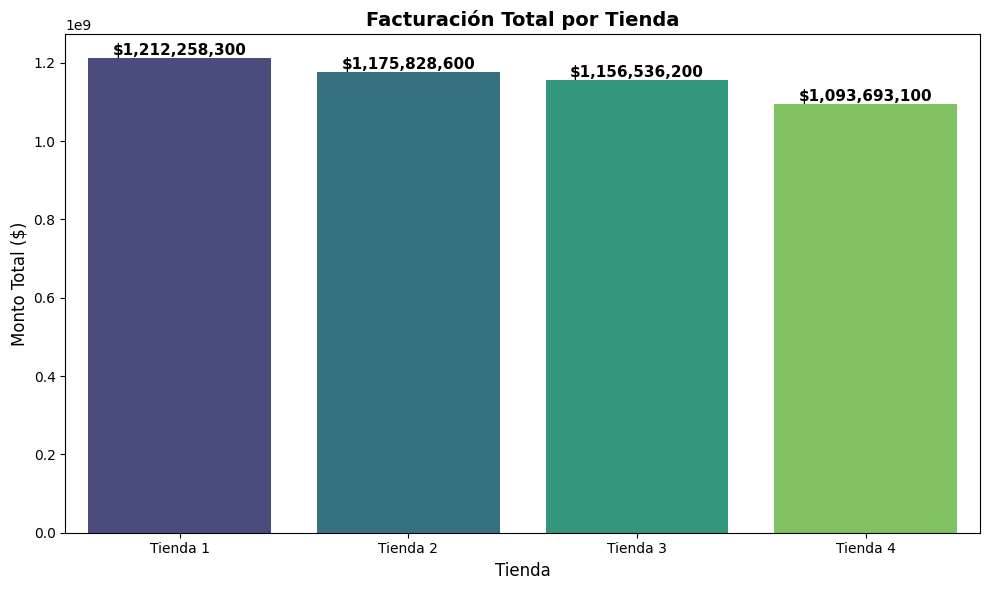

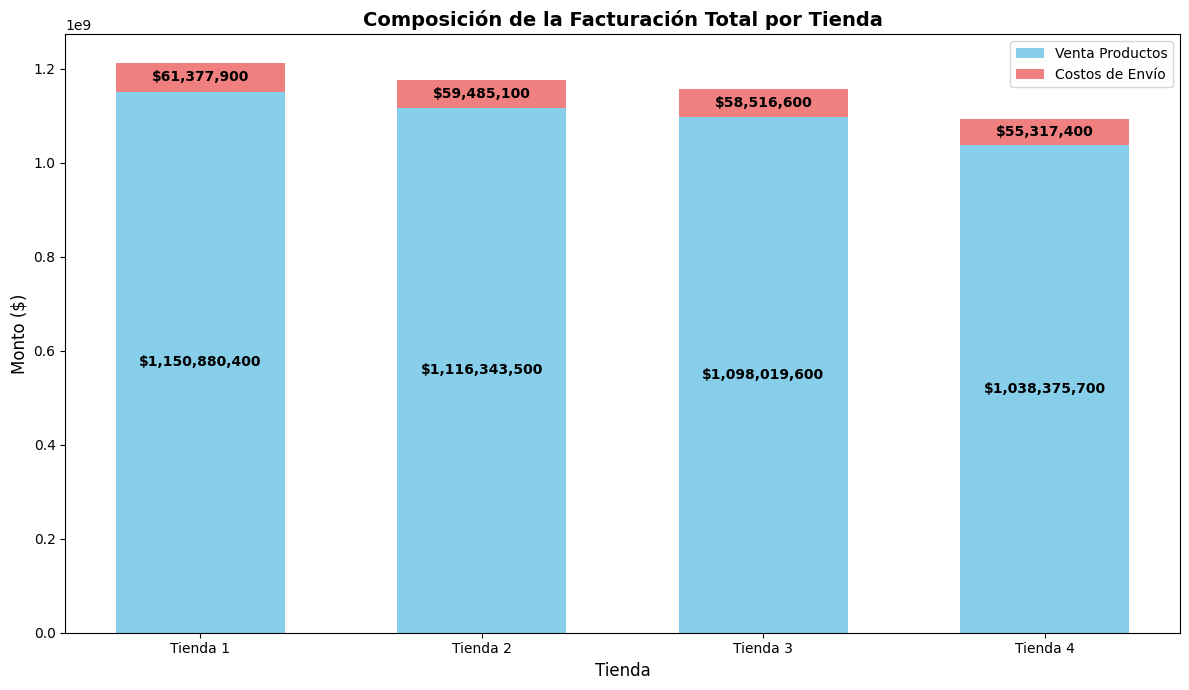

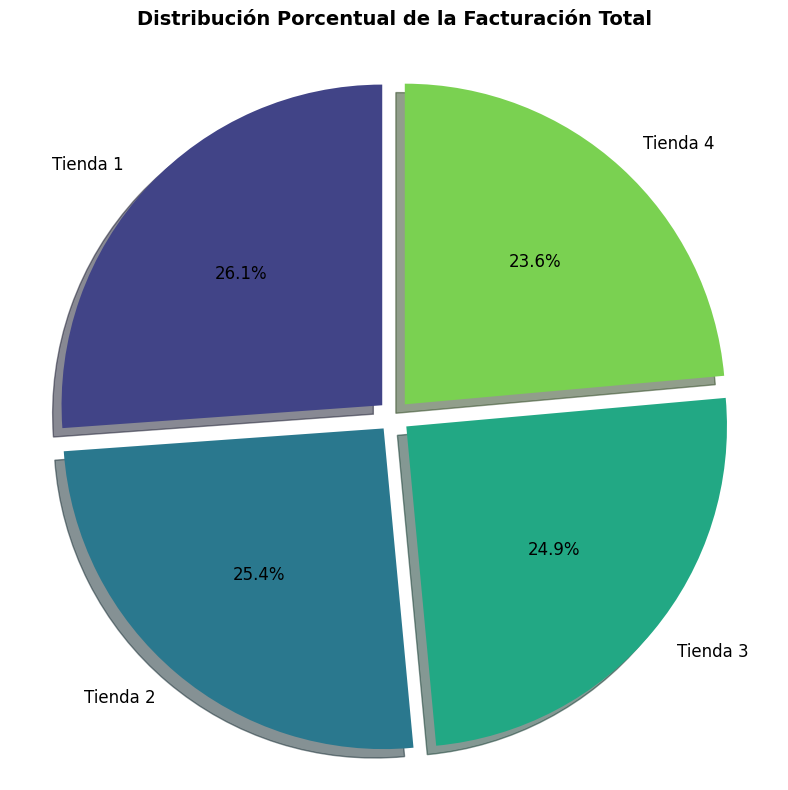


Análisis de facturación total:
La tienda con mayor facturación total es Tienda 1 con $1,212,258,300.00 (26.1% del total)
La tienda con menor facturación total es Tienda 4 con $1,093,693,100.00 (23.6% del total)
La diferencia entre la mayor y menor facturación es $118,565,200.00
La facturación promedio por tienda es $1,159,579,050.00


In [92]:
# Calculate the total for each dataframe by summing 'Precio' and 'Costo de envío'
tienda1["total"] = tienda1["Precio"] + tienda1["Costo de envío"]
tienda2["total"] = tienda2["Precio"] + tienda2["Costo de envío"]
tienda3["total"] = tienda3["Precio"] + tienda3["Costo de envío"]
tienda4["total"] = tienda4["Precio"] + tienda4["Costo de envío"]

# Compute the total sum for each dataframe
total1 = tienda1["total"].sum()
total2 = tienda2["total"].sum()
total3 = tienda3["total"].sum()
total4 = tienda4["total"].sum()

print(f"Total facturación tienda 1: ${total1:,.2f}")
print(f"Total facturación tienda 2: ${total2:,.2f}")
print(f"Total facturación tienda 3: ${total3:,.2f}")
print(f"Total facturación tienda 4: ${total4:,.2f}")
print(f"Total facturación global: ${(total1 + total2 + total3 + total4):,.2f}")

# Crear un DataFrame para la visualización
facturacion_total = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
        "Facturación Total": [total1, total2, total3, total4],
        "Venta Productos": [
            total_productos1,
            total_productos2,
            total_productos3,
            total_productos4,
        ],
        "Costos de Envío": [total_envio1, total_envio2, total_envio3, total_envio4],
    }
)

# Gráfico de barras para facturación total
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Tienda",
    y="Facturación Total",
    data=facturacion_total,
    hue="Tienda",
    palette="viridis",
    legend=False,
)
plt.title("Facturación Total por Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Monto Total ($)", fontsize=12)

# Añadir etiquetas de valores en las barras
for i, p in enumerate(ax.patches):
    ax.annotate(
        f'${facturacion_total["Facturación Total"][i]:,.0f}',
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Gráfico de barras apiladas para mostrar la composición de la facturación
plt.figure(figsize=(12, 7))

# Preparar datos para barras apiladas
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
facturacion_productos = [
    total_productos1,
    total_productos2,
    total_productos3,
    total_productos4,
]
facturacion_envios = [total_envio1, total_envio2, total_envio3, total_envio4]

# Crear gráfico de barras apiladas
bar_width = 0.6
indices = np.arange(len(tiendas))

p1 = plt.bar(
    indices, facturacion_productos, bar_width, label="Venta Productos", color="skyblue"
)
p2 = plt.bar(
    indices,
    facturacion_envios,
    bar_width,
    bottom=facturacion_productos,
    label="Costos de Envío",
    color="lightcoral",
)

# Añadir etiquetas y título
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Monto ($)", fontsize=12)
plt.title(
    "Composición de la Facturación Total por Tienda", fontsize=14, fontweight="bold"
)
plt.xticks(indices, tiendas)
plt.legend(loc="upper right")

# Añadir etiquetas de valores dentro de las barras
for i, bar in enumerate(p1):
    height = bar.get_height()
    if height > 100000:  # Solo mostrar etiqueta si el valor es significativo
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height / 2,
            f"${facturacion_productos[i]:,.0f}",
            ha="center",
            va="center",
            color="black",
            fontsize=10,
            fontweight="bold",
        )

for i, bar in enumerate(p2):
    height = bar.get_height()
    bottom = bar.get_y()
    if height > 50000:  # Solo mostrar etiqueta si el valor es significativo
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            bottom + height / 2,
            f"${facturacion_envios[i]:,.0f}",
            ha="center",
            va="center",
            color="black",
            fontsize=10,
            fontweight="bold",
        )

plt.tight_layout()
plt.show()

# Gráfico de pastel para mostrar la distribución de la facturación total
plt.figure(figsize=(8, 8))
plt.pie(
    [total1, total2, total3, total4],
    labels=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    autopct="%1.1f%%",
    startangle=90,
    explode=[0.05, 0.05, 0.05, 0.05],
    shadow=True,
    colors=sns.color_palette("viridis", 4),
    textprops={"fontsize": 12},
)
plt.title(
    "Distribución Porcentual de la Facturación Total",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
plt.axis("equal")
plt.tight_layout()
plt.show()

# Análisis e interpretación
print("\nAnálisis de facturación total:\n" + "=" * 30)
tienda_mayor_fact = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmax([total1, total2, total3, total4])
]
tienda_menor_fact = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmin([total1, total2, total3, total4])
]
fact_mayor = max(total1, total2, total3, total4)
fact_menor = min(total1, total2, total3, total4)
facturacion_global = total1 + total2 + total3 + total4

print(
    f"La tienda con mayor facturación total es {tienda_mayor_fact} con ${fact_mayor:,.2f} ({(fact_mayor/facturacion_global*100):.1f}% del total)"
)
print(
    f"La tienda con menor facturación total es {tienda_menor_fact} con ${fact_menor:,.2f} ({(fact_menor/facturacion_global*100):.1f}% del total)"
)
print(
    f"La diferencia entre la mayor y menor facturación es ${(fact_mayor - fact_menor):,.2f}"
)
print(f"La facturación promedio por tienda es ${(facturacion_global/4):,.2f}")

## Conclusiones del análisis de facturación

In [93]:
# Crear un dataframe resumen de facturación
resumen = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
        "Ventas Productos": [
            total_productos1,
            total_productos2,
            total_productos3,
            total_productos4,
        ],
        "Costos Envío": [total_envio1, total_envio2, total_envio3, total_envio4],
        "Facturación Total": [total1, total2, total3, total4],
        "% Envío/Venta": [
            (total_envio1 / total_productos1 * 100).round(2),
            (total_envio2 / total_productos2 * 100).round(2),
            (total_envio3 / total_productos3 * 100).round(2),
            (total_envio4 / total_productos4 * 100).round(2),
        ],
    }
)

# Añadir métricas globales
resumen.loc[4] = [
    "Total Global",
    resumen["Ventas Productos"].sum(),
    resumen["Costos Envío"].sum(),
    resumen["Facturación Total"].sum(),
    (resumen["Costos Envío"].sum() / resumen["Ventas Productos"].sum() * 100).round(2),
]

# Dar formato al dataframe para mejor visualización
resumen_formateado = resumen.copy()
for col in ["Ventas Productos", "Costos Envío", "Facturación Total"]:
    resumen_formateado[col] = resumen_formateado[col].apply(lambda x: f"${x:,.2f}")
resumen_formateado["% Envío/Venta"] = resumen_formateado["% Envío/Venta"].apply(
    lambda x: f"{x}%"
)

# Mostrar tabla resumen
print("\nTabla Resumen de Facturación:\n" + "=" * 50)
print(resumen_formateado)

print("\nConclusiones del análisis de facturación:\n" + "=" * 50)
print(
    f"1. La facturación total de las cuatro tiendas es de ${resumen['Facturación Total'].sum():,.2f}"
)
print(
    f"2. {tienda_mayor_fact} lidera las ventas con ${fact_mayor:,.2f}, lo que representa un {(fact_mayor/facturacion_global*100):.1f}% del total."
)
print(
    f"3. Los costos de envío representan en promedio un {(resumen['Costos Envío'].sum() / resumen['Ventas Productos'].sum() * 100):.2f}% del valor de los productos."
)
print(
    f"4. La tienda con mejor relación producto/envío es {tienda_menor_prop} con solo {min(envios['Proporción Envío/Venta']):.2f}% de costo de envío respecto al valor de los productos."
)
print(
    f"5. Existe una diferencia de ${(fact_mayor - fact_menor):,.2f} entre la tienda con mayor y menor facturación."
)


Tabla Resumen de Facturación:
         Tienda   Ventas Productos     Costos Envío  Facturación Total  \
0      Tienda 1  $1,150,880,400.00   $61,377,900.00  $1,212,258,300.00   
1      Tienda 2  $1,116,343,500.00   $59,485,100.00  $1,175,828,600.00   
2      Tienda 3  $1,098,019,600.00   $58,516,600.00  $1,156,536,200.00   
3      Tienda 4  $1,038,375,700.00   $55,317,400.00  $1,093,693,100.00   
4  Total Global  $4,403,619,200.00  $234,697,000.00  $4,638,316,200.00   

  % Envío/Venta  
0         5.33%  
1         5.33%  
2         5.33%  
3         5.33%  
4         5.33%  

Conclusiones del análisis de facturación:
1. La facturación total de las cuatro tiendas es de $9,276,632,400.00
2. Tienda 1 lidera las ventas con $1,212,258,300.00, lo que representa un 26.1% del total.
3. Los costos de envío representan en promedio un 5.33% del valor de los productos.
4. La tienda con mejor relación producto/envío es Tienda 1 con solo 5.33% de costo de envío respecto al valor de los productos.


# 2. Ventas por categoría

En esta sección, analizaremos la distribución de ventas por categoría de productos en las cuatro tiendas. Este análisis nos permitirá identificar:
- Las categorías de productos más vendidas en cada tienda
- La distribución general de ventas por categoría en todas las tiendas
- Comparaciones entre tiendas para identificar patrones y diferencias en la demanda por categoría

TOP 3 CATEGORÍAS POR TIENDA

Tienda 1:
1. Electrónicos: $429,493,500.00
2. Electrodomésticos: $363,685,200.00
3. Muebles: $187,633,700.00
Estas 3 categorías representan el 85.22% de las ventas de la tienda

Tienda 2:
1. Electrónicos: $410,831,100.00
2. Electrodomésticos: $348,567,800.00
3. Muebles: $176,426,300.00
Estas 3 categorías representan el 83.83% de las ventas de la tienda

Tienda 3:
1. Electrónicos: $410,775,800.00
2. Electrodomésticos: $329,237,900.00
3. Muebles: $201,072,100.00
Estas 3 categorías representan el 85.71% de las ventas de la tienda

Tienda 4:
1. Electrónicos: $409,476,100.00
2. Electrodomésticos: $283,260,200.00
3. Muebles: $192,528,900.00
Estas 3 categorías representan el 85.25% de las ventas de la tienda


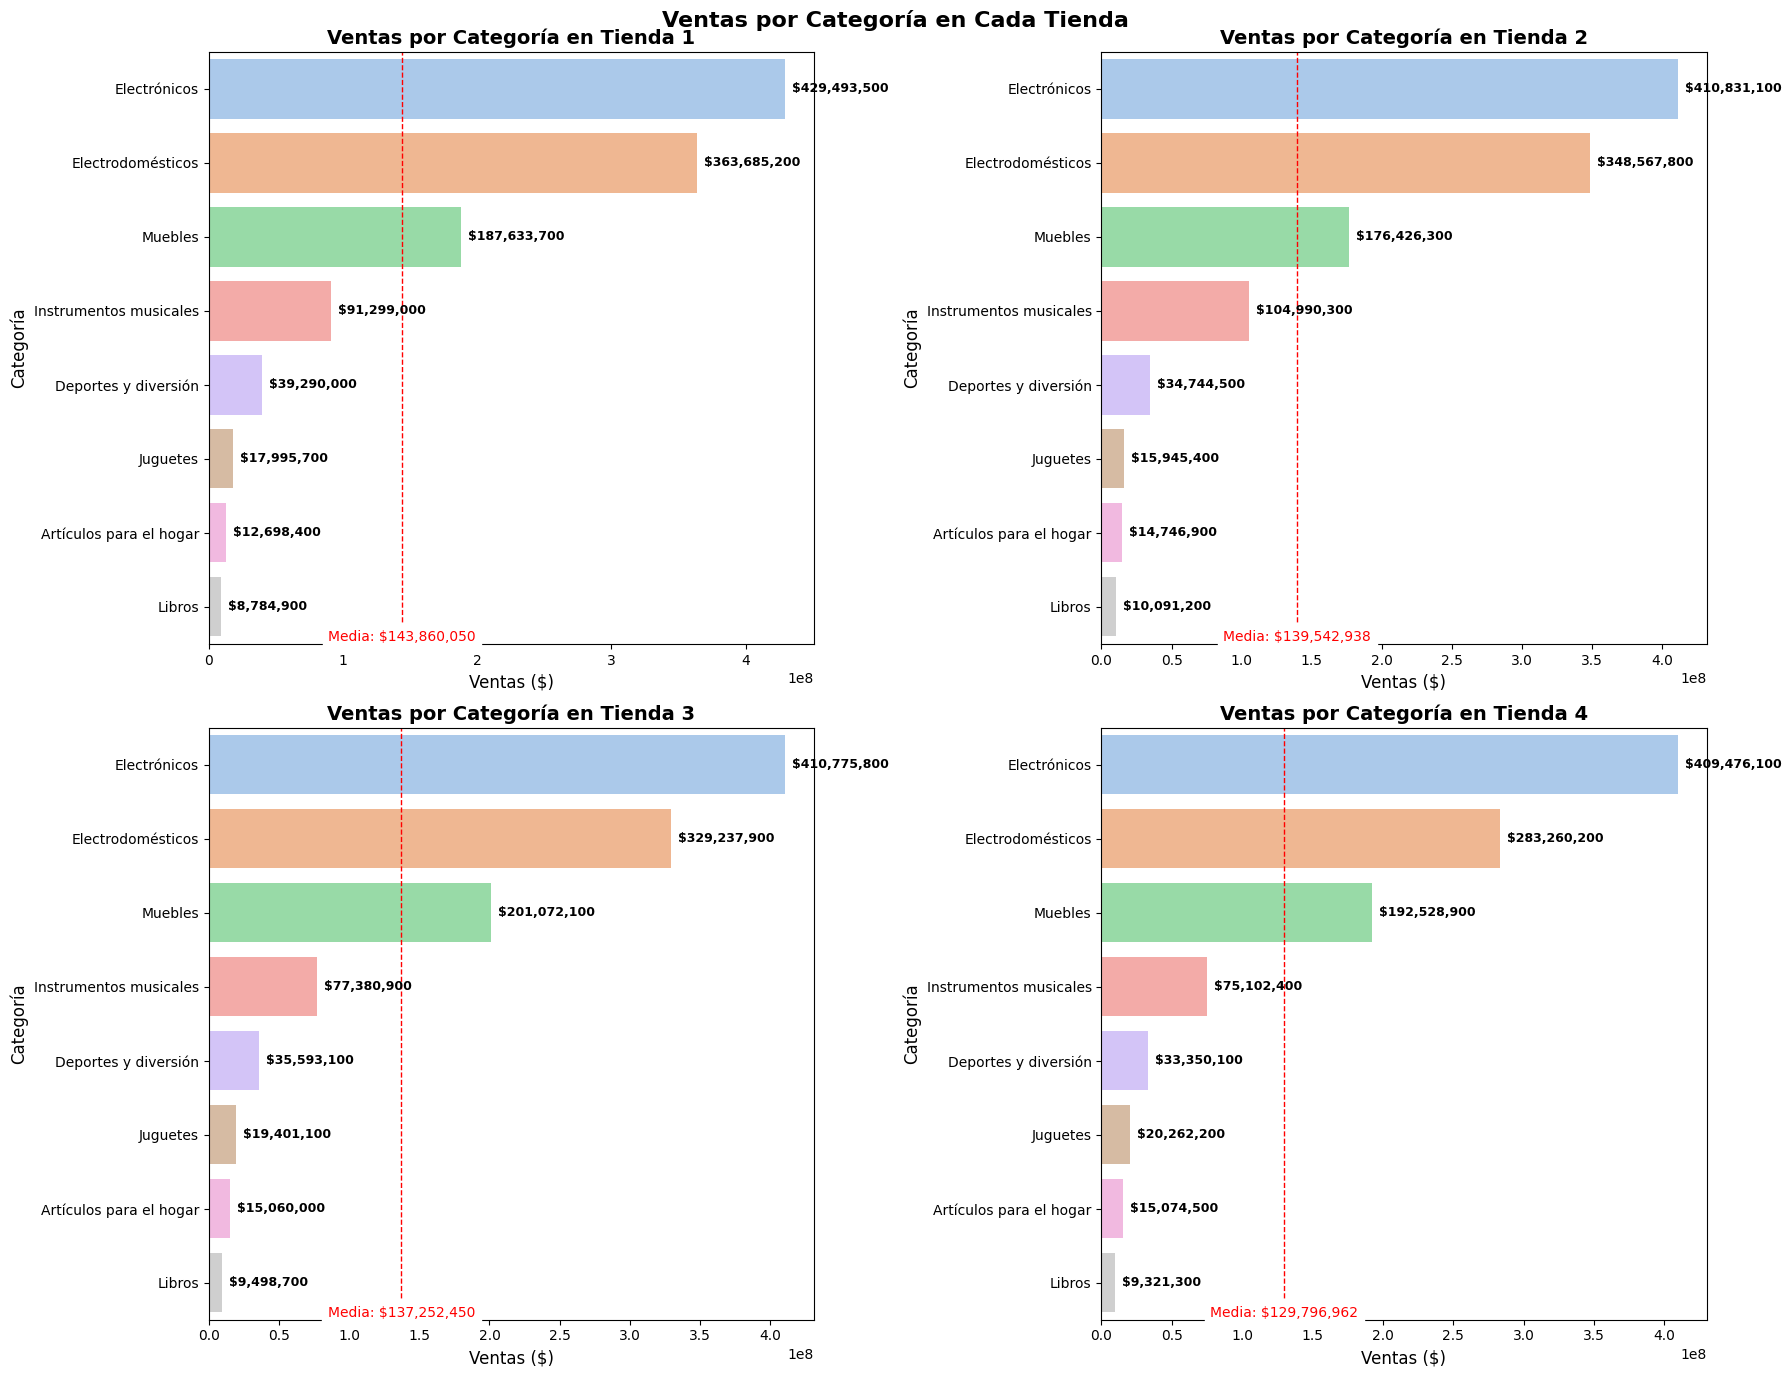

In [94]:
# Ventas por categoría para cada tienda
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo para gráficos
plt.style.use("seaborn-v0_8-pastel")
sns.set_palette("pastel")

# Agrupando las ventas por categoría para cada tienda
ventas_categoria_t1 = (
    tienda1.groupby("Categoría del Producto")["Precio"]
    .sum()
    .sort_values(ascending=False)
)
ventas_categoria_t2 = (
    tienda2.groupby("Categoría del Producto")["Precio"]
    .sum()
    .sort_values(ascending=False)
)
ventas_categoria_t3 = (
    tienda3.groupby("Categoría del Producto")["Precio"]
    .sum()
    .sort_values(ascending=False)
)
ventas_categoria_t4 = (
    tienda4.groupby("Categoría del Producto")["Precio"]
    .sum()
    .sort_values(ascending=False)
)

# Crear un diccionario para almacenar los DataFrames con formato para mejor visualización
ventas_categorias = {
    "Tienda 1": ventas_categoria_t1,
    "Tienda 2": ventas_categoria_t2,
    "Tienda 3": ventas_categoria_t3,
    "Tienda 4": ventas_categoria_t4,
}

# Top 3 categorías para cada tienda
print("TOP 3 CATEGORÍAS POR TIENDA\n" + "=" * 25)
for tienda, ventas in ventas_categorias.items():
    print(f"\n{tienda}:")
    top3 = ventas.head(3)
    for i, (cat, valor) in enumerate(top3.items(), 1):
        print(f"{i}. {cat}: ${valor:,.2f}")
    # Calcular el porcentaje de ventas que representan las top 3 categorías
    porcentaje_top3 = (top3.sum() / ventas.sum() * 100).round(2)
    print(
        f"Estas 3 categorías representan el {porcentaje_top3}% de las ventas de la tienda"
    )

# Visualizar las ventas por categoría para cada tienda
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
axs = axs.flatten()

for i, (tienda, ventas) in enumerate(ventas_categorias.items()):
    # Convertir a DataFrame para usar con sns.barplot
    df_ventas = pd.DataFrame({"Categoría": ventas.index, "Ventas": ventas.values})

    # Gráfico de barras horizontales para mejor visualización
    sns.barplot(
        y="Categoría",
        x="Ventas",
        data=df_ventas,
        ax=axs[i],
        hue="Categoría",
        legend=False,
    )

    # Añadir valores a las barras
    for j, p in enumerate(axs[i].patches):
        width = p.get_width()
        axs[i].annotate(
            f"${width:,.0f}",
            (width, p.get_y() + p.get_height() / 2),
            ha="left",
            va="center",
            fontsize=9,
            fontweight="bold",
            xytext=(5, 0),
            textcoords="offset points",
        )

    # Añadir título y etiquetas
    axs[i].set_title(
        f"Ventas por Categoría en {tienda}", fontsize=14, fontweight="bold"
    )
    axs[i].set_xlabel("Ventas ($)", fontsize=12)
    axs[i].set_ylabel("Categoría", fontsize=12)
    axs[i].tick_params(axis="y", labelsize=10)

    # Añadir línea de media
    media = ventas.mean()
    axs[i].axvline(x=media, color="red", linestyle="--", linewidth=1)
    axs[i].text(
        media,
        len(ventas) - 0.5,
        f"Media: ${media:,.0f}",
        color="red",
        ha="center",
        va="bottom",
        backgroundcolor="white",
        fontsize=10,
    )

plt.tight_layout()
plt.subplots_adjust(top=0.95)
fig.suptitle("Ventas por Categoría en Cada Tienda", fontsize=16, fontweight="bold")
plt.show()

In [95]:
# Concatenando todos los dataframes para análisis global
tiendas_completo = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Añadiendo un identificador de tienda para análisis
tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Dataset enriquecido para análisis
tiendas_enriquecido = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular el número de productos vendidos por categoría
productos_por_categoria = (
    tiendas_completo.groupby("Categoría del Producto")["Producto"]
    .count()
    .sort_values(ascending=False)
)

# Mostrar la cantidad de productos vendidos por categoría
print("\nCantidad de productos vendidos por categoría:")
print(productos_por_categoria)

# Calcular el precio promedio por categoría
precio_promedio_por_categoria = (
    tiendas_completo.groupby("Categoría del Producto")["Precio"]
    .mean()
    .sort_values(ascending=False)
    .round(2)
)

# Mostrar el precio promedio por categoría
print("\nPrecio promedio por categoría:")
print(precio_promedio_por_categoria)


Cantidad de productos vendidos por categoría:
Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: Producto, dtype: int64

Precio promedio por categoría:
Categoría del Producto
Electrodomésticos          1152960.05
Electrónicos                937119.92
Instrumentos musicales      463177.42
Muebles                     401729.06
Deportes y diversión        128461.55
Artículos para el hogar      78876.44
Juguetes                     57057.67
Libros                       50803.37
Name: Precio, dtype: float64


## Ventas Totales por Categoría en Todas las Tiendas

Vamos a analizar cuáles son las categorías de productos que generan mayor valor de ventas en el conjunto de todas las tiendas.

Ventas totales por categoría en todas las tiendas:
Electrónicos: $1,660,576,500.00
Electrodomésticos: $1,324,751,100.00
Muebles: $757,661,000.00
Instrumentos musicales: $348,772,600.00
Deportes y diversión: $142,977,700.00
Juguetes: $73,604,400.00
Artículos para el hogar: $57,579,800.00
Libros: $37,696,100.00


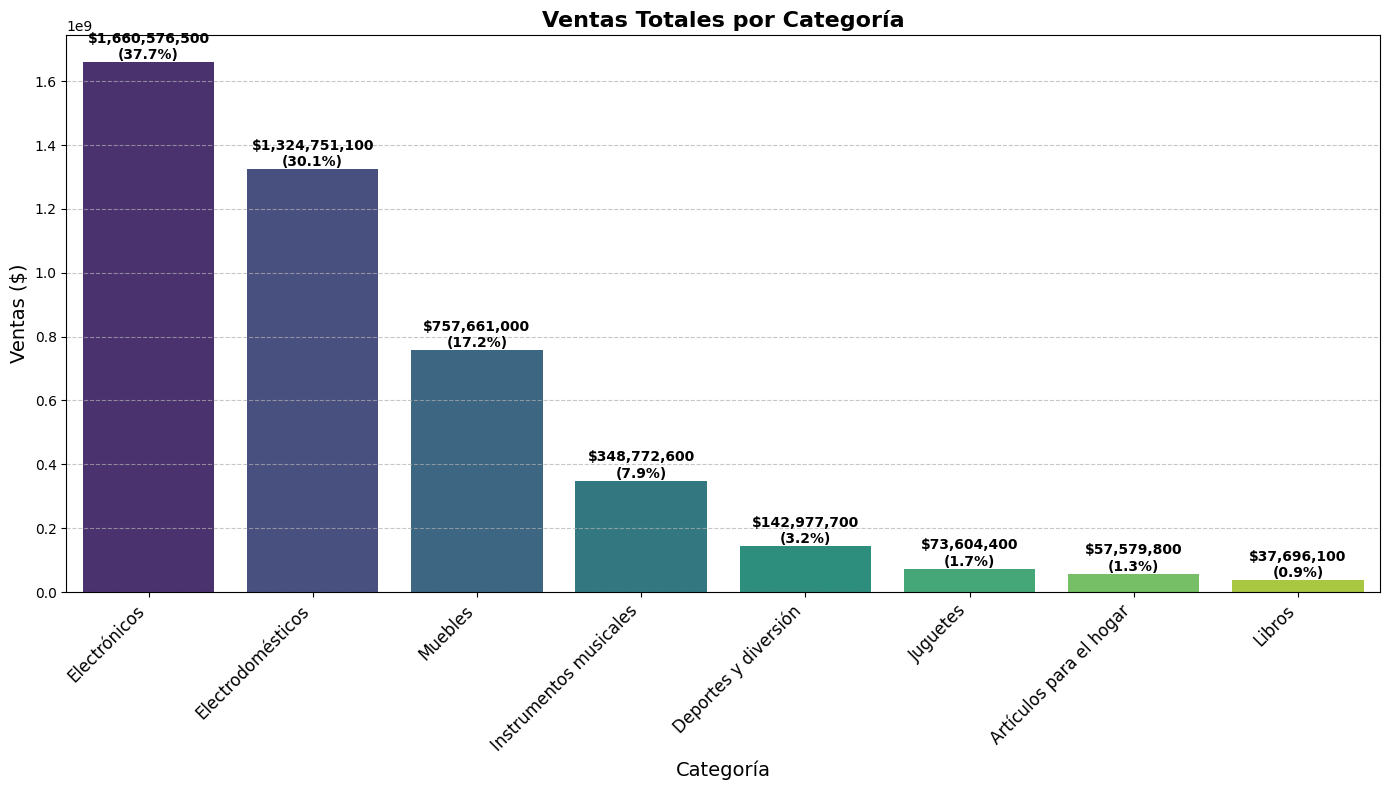

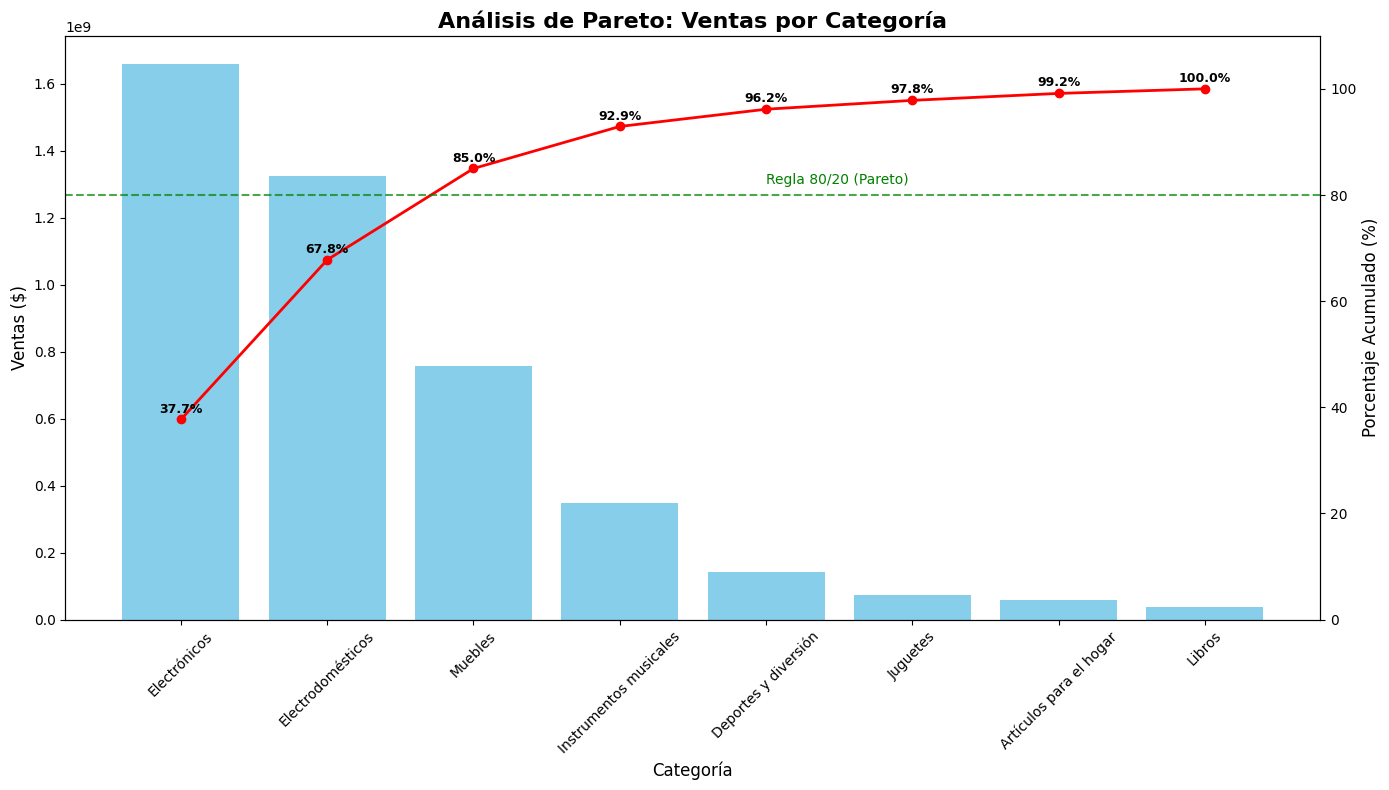


Análisis de Pareto:
El 2 de 8 categorías (25.0%) generan el 67.8% de las ventas totales.
Estas categorías son:
1. Electrónicos: $1,660,576,500.00 (37.7% del total)
2. Electrodomésticos: $1,324,751,100.00 (30.1% del total)


In [96]:
# Calcular ventas totales por categoría en todas las tiendas
ventas_categoria_total = (
    tiendas_completo.groupby("Categoría del Producto")["Precio"]
    .sum()
    .sort_values(ascending=False)
)

print("Ventas totales por categoría en todas las tiendas:")
for cat, valor in ventas_categoria_total.items():
    print(f"{cat}: ${valor:,.2f}")

# Calcular el porcentaje acumulado para análisis de Pareto
total_ventas_global = ventas_categoria_total.sum()
ventas_porcentaje = (ventas_categoria_total / total_ventas_global * 100).round(2)
ventas_acumulado = ventas_porcentaje.cumsum()

# Crear DataFrame para mejor manipulación
df_analisis = pd.DataFrame(
    {
        "Categoría": ventas_categoria_total.index,
        "Ventas": ventas_categoria_total.values,
        "Porcentaje": ventas_porcentaje.values,
        "Acumulado": ventas_acumulado.values,
    }
)

# Gráfico de barras mejorado para ventas totales
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x="Categoría",
    y="Ventas",
    data=df_analisis,
    hue="Categoría",
    palette="viridis",
    legend=False,
)

# Añadir etiquetas de valores en las barras
for i, p in enumerate(ax.patches):
    altura = p.get_height()
    porcentaje = df_analisis["Porcentaje"][i]
    ax.annotate(
        f"${altura:,.0f}\n({porcentaje:.1f}%)",
        (p.get_x() + p.get_width() / 2.0, altura),
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

# Mejorar apariencia del gráfico
plt.title("Ventas Totales por Categoría", fontsize=16, fontweight="bold")
plt.xlabel("Categoría", fontsize=14)
plt.ylabel("Ventas ($)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de Pareto (barras + línea acumulada)
fig, ax1 = plt.subplots(figsize=(14, 8))

# Barras para mostrar el valor de ventas
ax1.bar(df_analisis["Categoría"], df_analisis["Ventas"], color="skyblue")
ax1.set_xlabel("Categoría", fontsize=12)
ax1.set_ylabel("Ventas ($)", fontsize=12)
ax1.set_title(
    "Análisis de Pareto: Ventas por Categoría", fontsize=16, fontweight="bold"
)
ax1.tick_params(axis="x", rotation=45, labelsize=10)

# Línea para mostrar el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(
    df_analisis["Categoría"], df_analisis["Acumulado"], "ro-", linewidth=2, markersize=6
)
ax2.set_ylabel("Porcentaje Acumulado (%)", fontsize=12)
ax2.set_ylim([0, 110])

# Añadir línea de 80% (regla de Pareto)
ax2.axhline(y=80, color="green", linestyle="--", alpha=0.7)
ax2.text(
    len(df_analisis["Categoría"]) / 2,
    82,
    "Regla 80/20 (Pareto)",
    color="green",
    fontsize=10,
)

# Añadir puntos de datos para mejor lectura
for i, (cat, acum) in enumerate(
    zip(df_analisis["Categoría"], df_analisis["Acumulado"])
):
    ax2.annotate(
        f"{acum:.1f}%",
        (i, acum),
        xytext=(0, 5),
        textcoords="offset points",
        ha="center",
        fontsize=9,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Análisis de la regla de Pareto (80/20)
categorias_80 = df_analisis[df_analisis["Acumulado"] <= 80]
print(f"\nAnálisis de Pareto:")
print(
    f"El {len(categorias_80)} de {len(df_analisis)} categorías ({(len(categorias_80)/len(df_analisis)*100):.1f}%) "
    + f"generan el {categorias_80['Acumulado'].max():.1f}% de las ventas totales."
)
print("Estas categorías son:")
for i, (idx, row) in enumerate(categorias_80.iterrows(), 1):
    print(
        f"{i}. {row['Categoría']}: ${row['Ventas']:,.2f} ({row['Porcentaje']:.1f}% del total)"
    )

## Distribución Porcentual de Ventas por Categoría

En esta sección visualizamos cómo se distribuyen porcentualmente las ventas entre las diferentes categorías de productos, lo que nos permite identificar cuáles son las más importantes en términos relativos.

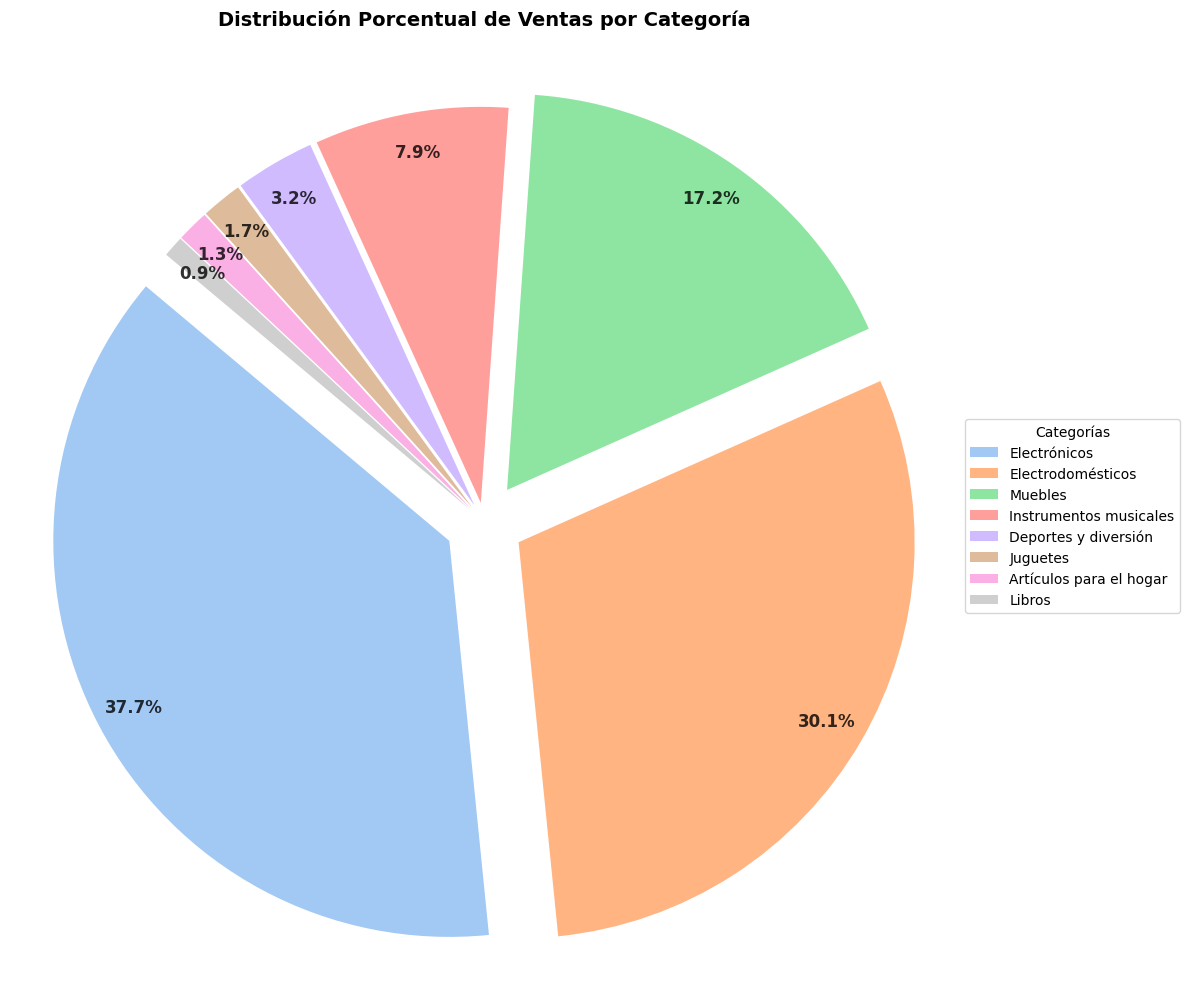


Análisis de la distribución porcentual de ventas:
La categoría de mayor venta 'Electrónicos' representa el 37.71% del total
Las tres principales categorías representan el 85.00% del total

Índice de concentración de ventas: 2701.57/10000
Interpretación: Mercado altamente concentrado - Pocas categorías concentran la mayoría de las ventas


In [97]:
# Calculando el porcentaje de ventas por categoría
total_ventas = ventas_categoria_total.sum()
ventas_porcentaje = (ventas_categoria_total / total_ventas * 100).round(2)

# Clasificar categorías por importancia para mejor visualización
ventas_principales = ventas_porcentaje[
    ventas_porcentaje >= 5
]  # Categorías con más del 5%
ventas_secundarias = ventas_porcentaje[
    ventas_porcentaje < 5
]  # Categorías con menos del 5%

# Si hay muchas categorías pequeñas, agruparlas en 'Otras'
si_agrupar = len(ventas_secundarias) > 4
if si_agrupar:
    otras = pd.Series([ventas_secundarias.sum()], index=["Otras categorías"])
    ventas_para_grafico = pd.concat([ventas_principales, otras])
else:
    ventas_para_grafico = ventas_porcentaje

# Crear gráfico de pastel para mostrar la distribución de ventas por categoría
plt.figure(figsize=(12, 10))
# Ajustar el tamaño de la figura y agregar espacio en la parte superior para el título
plt.subplots_adjust(top=0.85)

# Configurar colores y explosión (destacar categorías principales)
colors = sns.color_palette("pastel", len(ventas_para_grafico))
explode = [
    0.1 if p >= 10 else 0.05 for p in ventas_para_grafico
]  # Destacar categorías con más del 10%

# Leyendas para el Grafico de pastel
patches, texts, autotexts = plt.pie(
    ventas_para_grafico,
    autopct="%1.1f%%",
    startangle=140,
    pctdistance=0.9,
    labels=None,
    colors=colors,
    explode=explode,
)

# Mejorar la apariencia del texto de porcentajes
plt.setp(autotexts, size=12, weight="bold", color="black", alpha=0.8, ha="center")

# Añadir título con más espacio desde el gráfico
plt.title(
    "Distribución Porcentual de Ventas por Categoría",
    pad=20,
    fontsize=14,
    fontweight="bold",
)

# Añadir una leyenda fuera del gráfico
plt.legend(
    patches,
    ventas_para_grafico.index,
    title="Categorías",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10,
)

plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

# Análisis adicional de la distribución
print("\nAnálisis de la distribución porcentual de ventas:")
print(
    f"La categoría de mayor venta '{ventas_porcentaje.idxmax()}' representa el {ventas_porcentaje.max():.2f}% del total"
)
print(
    f"Las tres principales categorías representan el {ventas_porcentaje.nlargest(3).sum():.2f}% del total"
)

# Calcular el índice de concentración (similar a Herfindahl-Hirschman Index)
hhi = (ventas_porcentaje / 100 * ventas_porcentaje / 100).sum() * 10000
print(f"\nÍndice de concentración de ventas: {hhi:.2f}/10000")
if hhi < 1500:
    print(
        "Interpretación: Mercado no concentrado - Las ventas están bien distribuidas entre varias categorías"
    )
elif hhi < 2500:
    print(
        "Interpretación: Mercado moderadamente concentrado - Algunas categorías dominan las ventas"
    )
else:
    print(
        "Interpretación: Mercado altamente concentrado - Pocas categorías concentran la mayoría de las ventas"
    )

## Comparación de Ventas por Categoría entre Tiendas

Este análisis nos permite identificar las fortalezas y debilidades de cada tienda en relación a las diferentes categorías de productos, detectando oportunidades de especialización o mejora.

<Figure size 1400x800 with 0 Axes>

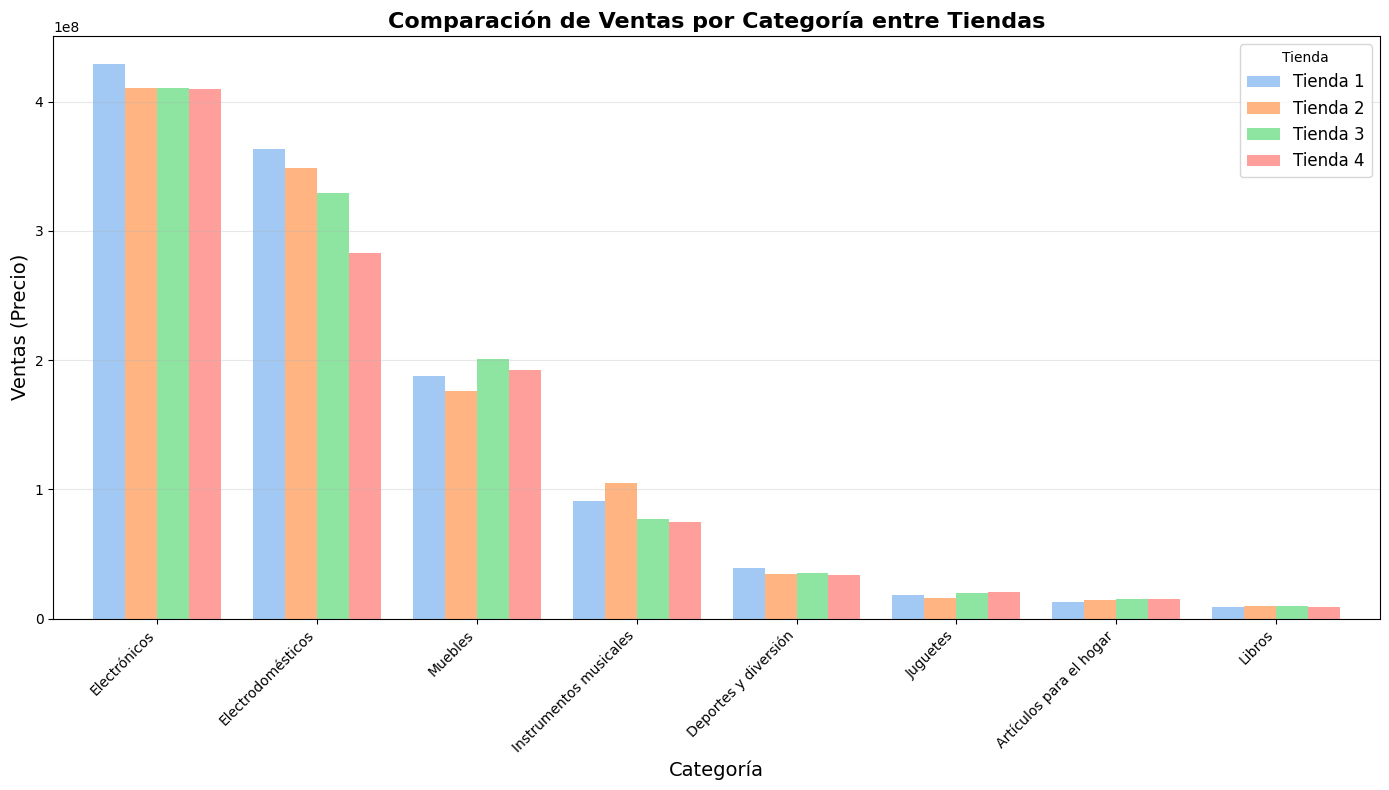

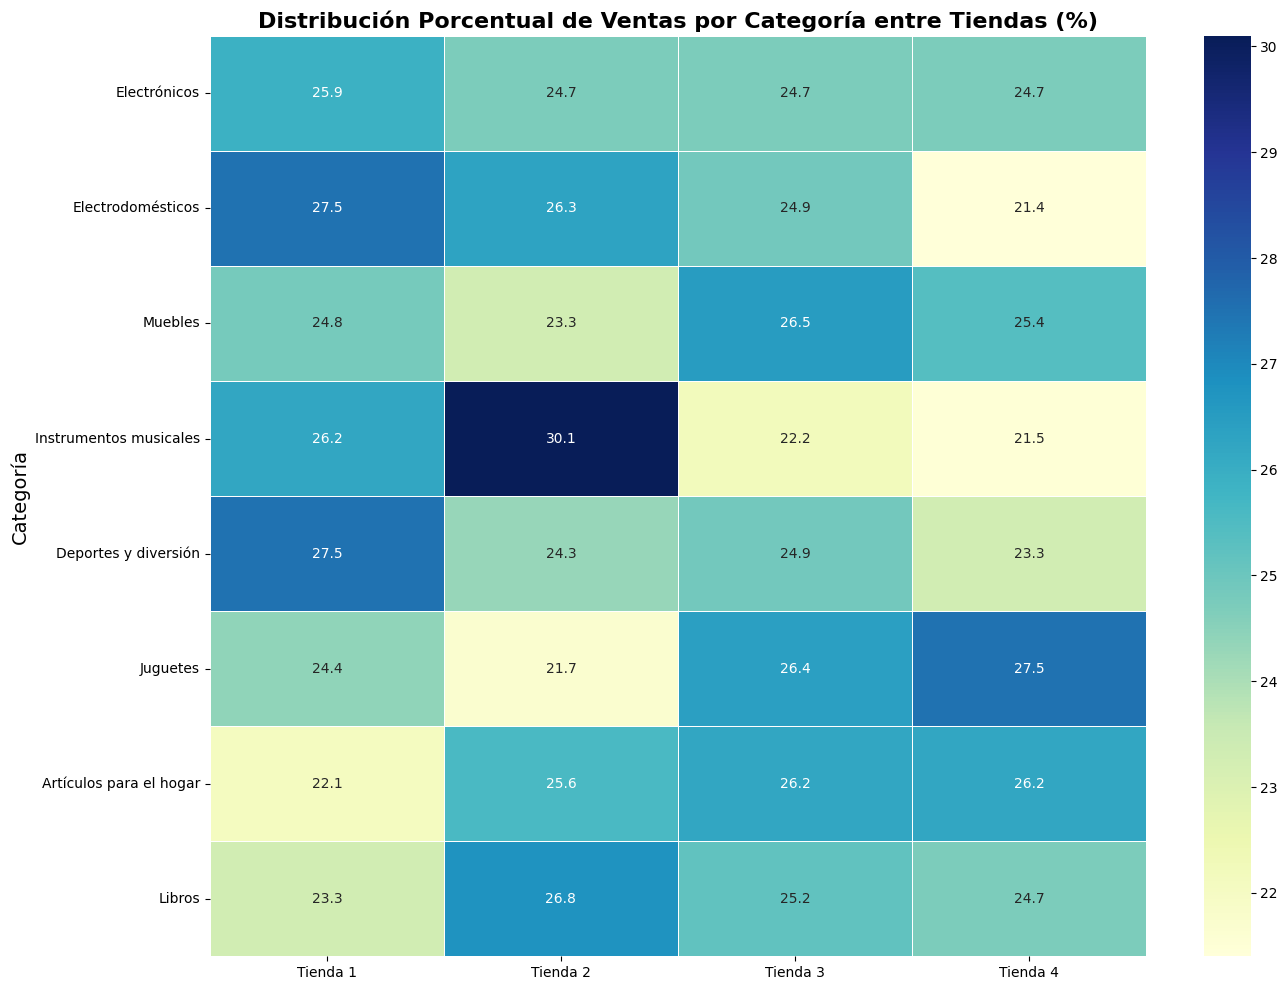


Análisis de especialización por tienda:

Tienda 1 lidera en 3 categorías:
- Electrodomésticos: 27.5% de las ventas totales de esta categoría
- Deportes y diversión: 27.5% de las ventas totales de esta categoría
- Electrónicos: 25.9% de las ventas totales de esta categoría

Tienda 2 lidera en 2 categorías:
- Instrumentos musicales: 30.1% de las ventas totales de esta categoría
- Libros: 26.8% de las ventas totales de esta categoría

Tienda 3 lidera en 2 categorías:
- Muebles: 26.5% de las ventas totales de esta categoría
- Artículos para el hogar: 26.2% de las ventas totales de esta categoría

Tienda 4 lidera en 2 categorías:
- Juguetes: 27.5% de las ventas totales de esta categoría
- Artículos para el hogar: 26.2% de las ventas totales de esta categoría


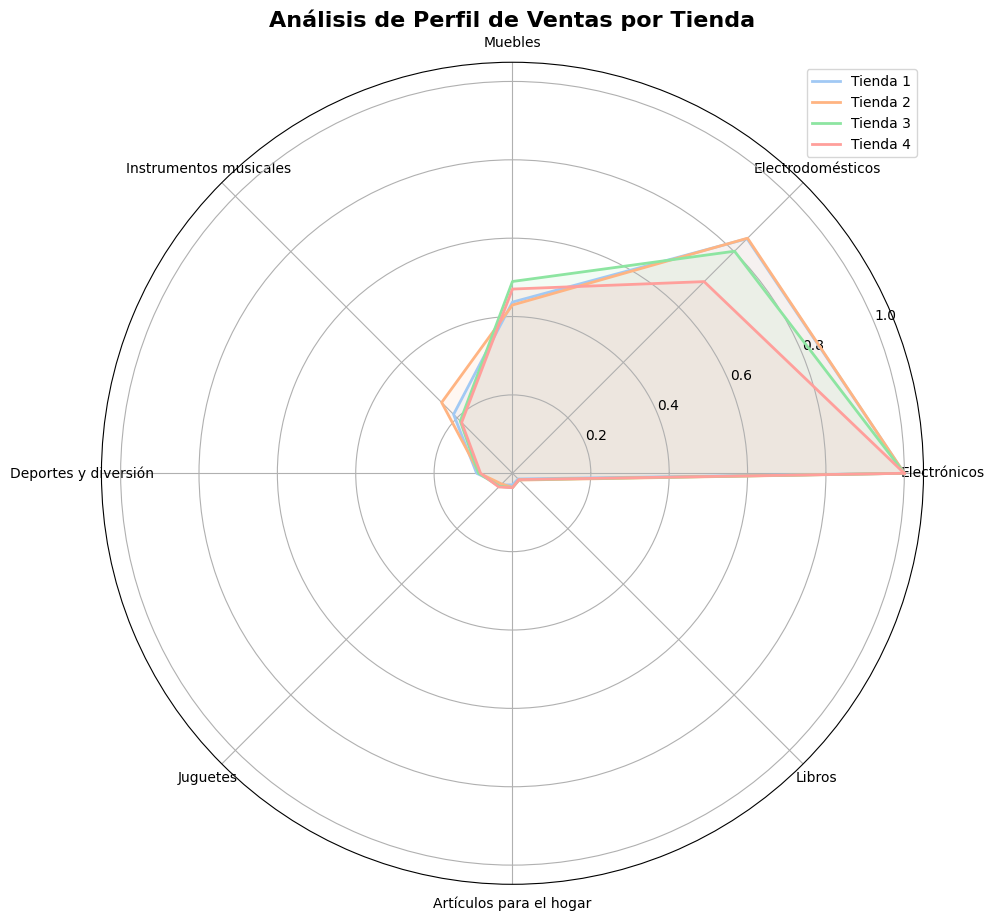

In [98]:
# Análisis comparativo de ventas por categoría entre tiendas
categorias = ventas_categoria_total.index

# Creando un dataframe para la comparación
comparacion = pd.DataFrame(
    {
        "Tienda 1": pd.Series(ventas_categoria_t1, index=categorias).fillna(0),
        "Tienda 2": pd.Series(ventas_categoria_t2, index=categorias).fillna(0),
        "Tienda 3": pd.Series(ventas_categoria_t3, index=categorias).fillna(0),
        "Tienda 4": pd.Series(ventas_categoria_t4, index=categorias).fillna(0),
    }
)

# Añadir columnas de totales y porcentajes para análisis
comparacion["Total"] = comparacion.sum(axis=1)
for tienda in ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]:
    comparacion[f"% {tienda}"] = (
        comparacion[tienda] / comparacion["Total"] * 100
    ).round(1)

# Visualización 1: Gráfico de barras apiladas para comparación
plt.figure(figsize=(14, 8))
comparacion_plot = comparacion[["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]]
ax = comparacion_plot.plot(kind="bar", figsize=(14, 8), width=0.8)
plt.title(
    "Comparación de Ventas por Categoría entre Tiendas", fontsize=16, fontweight="bold"
)
plt.xlabel("Categoría", fontsize=14)
plt.ylabel("Ventas (Precio)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tienda", fontsize=12)
plt.grid(axis="y", alpha=0.3)

# Añadir etiquetas para las categorías principales
top_categorias = comparacion.nlargest(3, "Total").index
for i, categoria in enumerate(categorias):
    if categoria in top_categorias:
        plt.annotate(
            f"{categoria}",
            xy=(i, comparacion.loc[categoria, "Total"]),
            xytext=(0, 10),
            textcoords="offset points",
            ha="center",
            fontweight="bold",
            bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3),
        )

plt.tight_layout()
plt.show()

# Visualización 2: Heatmap para identificar fortalezas/debilidades por tienda
plt.figure(figsize=(14, 10))
# Usar las columnas de porcentaje para el heatmap
heatmap_data = comparacion[
    [f"% {tienda}" for tienda in ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]]
]
heatmap_data.columns = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Ordenar las filas para mejor visualización
heatmap_data = heatmap_data.loc[comparacion.sort_values("Total", ascending=False).index]

# Crear heatmap
ax = sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title(
    "Distribución Porcentual de Ventas por Categoría entre Tiendas (%)",
    fontsize=16,
    fontweight="bold",
)
plt.ylabel("Categoría", fontsize=14)
plt.tight_layout()
plt.show()

# Análisis de especialización por tienda
print("\nAnálisis de especialización por tienda:")
for tienda in ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]:
    # Identificar las categorías donde esta tienda tiene el mayor porcentaje
    categorias_dominantes = []
    for categoria in categorias:
        porcentajes_tienda = [
            comparacion.loc[categoria, f"% {t}"]
            for t in ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
        ]
        if comparacion.loc[categoria, f"% {tienda}"] == max(porcentajes_tienda):
            categorias_dominantes.append(
                (categoria, comparacion.loc[categoria, f"% {tienda}"])
            )

    # Ordenar de mayor a menor porcentaje
    categorias_dominantes = sorted(
        categorias_dominantes, key=lambda x: x[1], reverse=True
    )

    print(f"\n{tienda} lidera en {len(categorias_dominantes)} categorías:")
    for cat, pct in categorias_dominantes:
        print(f"- {cat}: {pct}% de las ventas totales de esta categoría")

# Visualización 3: Análisis Radial (Spider Chart) para mostrar el perfil de cada tienda
# Seleccionar top 8 categorías para no saturar el gráfico
top_categorias = comparacion.nlargest(8, "Total").index
comparacion_radar = comparacion.loc[
    top_categorias, ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
]

# Normalizar datos para mejor comparación
comparacion_radar = comparacion_radar.div(comparacion_radar.max(axis=0), axis=1)

# Configurar gráfico
categorias = comparacion_radar.index
n_categorias = len(categorias)
angulos = np.linspace(0, 2 * np.pi, n_categorias, endpoint=False).tolist()
angulos += angulos[:1]  # Cerrar el círculo

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Dibujar cada tienda
for tienda in comparacion_radar.columns:
    valores = comparacion_radar[tienda].tolist()
    valores += valores[:1]  # Cerrar el polígono
    ax.plot(angulos, valores, linewidth=2, label=tienda)
    ax.fill(angulos, valores, alpha=0.1)

# Añadir etiquetas
ax.set_xticks(angulos[:-1])
ax.set_xticklabels(categorias, size=10)
plt.title("Análisis de Perfil de Ventas por Tienda", fontsize=16, fontweight="bold")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

## Conclusiones del análisis de ventas por categoría

In [99]:
# Crear un dataframe resumen para facilitar el análisis
resumen_categorias = pd.DataFrame(
    {
        "Categoría": ventas_categoria_total.index,
        "Venta Total": ventas_categoria_total.values,
        "% del Total": ventas_porcentaje.values,
        "Cant. Productos": productos_por_categoria[ventas_categoria_total.index].values,
        "Precio Promedio": precio_promedio_por_categoria[
            ventas_categoria_total.index
        ].values,
    }
)

# Ordenar por venta total descendente
resumen_categorias = resumen_categorias.sort_values(
    "Venta Total", ascending=False
).reset_index(drop=True)

# Dar formato a las columnas numéricas
resumen_categorias_formato = resumen_categorias.copy()
resumen_categorias_formato["Venta Total"] = resumen_categorias_formato[
    "Venta Total"
].apply(lambda x: f"${x:,.2f}")
resumen_categorias_formato["% del Total"] = resumen_categorias_formato[
    "% del Total"
].apply(lambda x: f"{x:.2f}%")
resumen_categorias_formato["Precio Promedio"] = resumen_categorias_formato[
    "Precio Promedio"
].apply(lambda x: f"${x:,.2f}")

# Mostrar tabla resumen
print("\nTabla Resumen de Ventas por Categoría:\n" + "=" * 60)
print(resumen_categorias_formato)

# Destacar hallazgos principales
print("\n\nCONCLUSIONES PRINCIPALES DEL ANÁLISIS DE VENTAS POR CATEGORÍA\n" + "=" * 60)

# Identificar categorías de alto valor
top_categoria = resumen_categorias.iloc[0]["Categoría"]
top_valor = resumen_categorias.iloc[0]["Venta Total"]
top_porcentaje = resumen_categorias.iloc[0]["% del Total"]

# Identificar categorías con mayor cantidad de productos vendidos
top_cantidad = resumen_categorias.sort_values("Cant. Productos", ascending=False).iloc[
    0
]

# Identificar categorías con mayor precio promedio
top_precio = resumen_categorias.sort_values("Precio Promedio", ascending=False).iloc[0]

# Conclusiones
print(
    f"1. La categoría '{top_categoria}' lidera las ventas con ${top_valor:,.2f}, representando el {top_porcentaje:.2f}% del total."
)
print(
    f"2. Las tres principales categorías ({', '.join(resumen_categorias['Categoría'][:3])}) representan el {resumen_categorias['% del Total'][:3].sum():.2f}% del total de ventas."
)
print(
    f"3. La categoría '{top_cantidad['Categoría']}' tiene la mayor cantidad de productos vendidos ({top_cantidad['Cant. Productos']}), lo que indica alta rotación de inventario."
)
print(
    f"4. La categoría '{top_precio['Categoría']}' tiene el mayor precio promedio (${top_precio['Precio Promedio']:,.2f}), lo que sugiere productos premium."
)

# Identificar tiendas especializadas
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
for tienda in tiendas:
    # Identificar categorias donde esta tienda tiene el mayor % del total
    categorias_principales = comparacion[
        comparacion[f"% {tienda}"]
        == comparacion[[f"% {t}" for t in tiendas]].max(axis=1)
    ]
    if not categorias_principales.empty:
        cat_principal = categorias_principales["Total"].idxmax()
        print(
            f"5. {tienda} tiene una especialización destacada en '{cat_principal}' con el {comparacion.loc[cat_principal, f'% {tienda}']:.1f}% del total de ventas de esta categoría."
        )
        break


Tabla Resumen de Ventas por Categoría:
                 Categoría        Venta Total % del Total  Cant. Productos  \
0             Electrónicos  $1,660,576,500.00      37.71%             1772   
1        Electrodomésticos  $1,324,751,100.00      30.08%             1149   
2                  Muebles    $757,661,000.00      17.21%             1886   
3   Instrumentos musicales    $348,772,600.00       7.92%              753   
4     Deportes y diversión    $142,977,700.00       3.25%             1113   
5                 Juguetes     $73,604,400.00       1.67%             1290   
6  Artículos para el hogar     $57,579,800.00       1.31%              730   
7                   Libros     $37,696,100.00       0.86%              742   

  Precio Promedio  
0     $937,119.92  
1   $1,152,960.05  
2     $401,729.06  
3     $463,177.42  
4     $128,461.55  
5      $57,057.67  
6      $78,876.44  
7      $50,803.37  


CONCLUSIONES PRINCIPALES DEL ANÁLISIS DE VENTAS POR CATEGORÍA
1. La categor

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda